##             <center>HELLO FRESH DATA SCIENCE ASSIGNMENT</center>    

**1\. Import the different libraries to be used for the data exploration and prediction**

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns # Data visualization
import numpy as np   #fundamental package for scientific computing
import pandas as pd  #fundamental package for data analysis

**2\. Read the train_data csv file and assign it to a dataframe named "df"**

In [43]:
df = pd.read_csv('data/UKretail.csv', encoding='latin1')

**3\. Data exploration**

In [44]:
df.head() #quick look at the first five rows of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,United Kingdom
4,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:02,1.85,17850.0,United Kingdom


In [45]:
df.isnull().sum() # Check for null values in the dataset

InvoiceNo          0
StockCode          0
Description      870
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     80991
Country            0
dtype: int64

80991 rows have no customerID. As we want to predict the future date of purchase for a customer, we need to be able to identify this customer somehow and therefore we will discard these records.

In [46]:
df.info() #high overview of the dataset with columns datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325145 entries, 0 to 325144
Data columns (total 8 columns):
InvoiceNo      325145 non-null object
StockCode      325145 non-null object
Description    324275 non-null object
Quantity       325145 non-null int64
InvoiceDate    325145 non-null object
UnitPrice      325145 non-null float64
CustomerID     244154 non-null float64
Country        325145 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 19.8+ MB


In [47]:
df.describe() #handy statistics about numerical columns

,Quantity,UnitPrice,CustomerID
count,325145.000000,325145.000000,244154.000000
mean,9.273340,4.845239,15288.823120
std,154.394112,116.830451,1713.496816
min,-80995.000000,-11062.060000,12347.000000
25%,1.000000,1.250000,13959.000000
50%,3.000000,2.080000,15150.000000
75%,10.000000,4.130000,16792.750000
max,12540.000000,38970.000000,18287.000000


The max and min values for both Quantity and UnitPrice seem a bit extremes and can be considered as outliers. However, without further information about these particular records, we will keep them.

In [48]:
df['Country'].value_counts()

United Kingdom          297350
Germany                   5745
France                    5124
EIRE                      4979
Spain                     1447
Netherlands               1398
Belgium                   1210
Switzerland               1190
Portugal                   894
Australia                  771
Norway                     664
Italy                      501
Channel Islands            453
Finland                    403
Cyprus                     376
Unspecified                271
Sweden                     265
Denmark                    235
Austria                    231
Japan                      206
Poland                     198
USA                        183
Israel                     170
Hong Kong                  163
Singapore                  142
Iceland                    103
Canada                      89
Greece                      87
Malta                       76
United Arab Emirates        42
European Community          40
RSA                         33
Lebanon 

In [49]:
len(df['StockCode'].unique())

3947

In [50]:
len(df['CustomerID'].unique())

4325

In [51]:
len(df['Description'].unique())

4071

In [52]:
len(df[df['InvoiceNo'].str.startswith('C')])

5587

In [53]:
stock_descrip_df = df.groupby(['StockCode','Description']).count().reset_index()

In [54]:
mask = stock_descrip_df.duplicated(subset = 'StockCode')

In [55]:
stock_descrip_df[stock_descrip_df['StockCode'].isin(stock_descrip_df[mask].StockCode)]

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7,10133,COLOURING PENCILS BROWN TUBE,113,113,113,113,71,113
8,10133,damaged,1,1,1,1,0,1
25,15058A,BLUE POLKADOT GARDEN PARASOL,49,49,49,49,30,49
26,15058A,wet/rusty,1,1,1,1,0,1
31,16008,SMALL FOLDING SCISSOR(POINTED EDGE),35,35,35,35,35,35
32,16008,check,1,1,1,1,0,1
49,16156L,WRAP CAROUSEL,8,8,8,8,8,8
50,16156L,"WRAP, CAROUSEL",1,1,1,1,1,1
58,16168M,FUNKY MONKEY GIFT BAG MEDIUM,27,27,27,27,13,27
59,16168M,found,1,1,1,1,0,1


Stock codes that have many description are actually the same item and the various description correspond to either a cancellation of the item, a repair, etc.

In [56]:
#Drop rows with no customer ID
df = df.dropna(subset = ['CustomerID'])

In [57]:
#Convert Customer ID to integers
df['CustomerID'] = df['CustomerID'].astype('int')

In [58]:
#Convert Invoice Data to a Date Format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [59]:
#Convert date to ordinal values
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.toordinal())

In [62]:
starting_date = df['InvoiceDate'].min()
latest_date = df['InvoiceDate'].max()
print(" earliest date (01/12/2010): ",starting_date,"\n","latest date (09/12/2011): ",latest_date)

 earliest date (01/12/2010):  734107 
 latest date (09/12/2011):  734480


In [63]:
#Reorder the dataset and order by customer ID, stockCode and Invoice Date
df = df[['CustomerID','StockCode','InvoiceDate', 'InvoiceNo','Description', 'Quantity','UnitPrice','Country']]
df = df.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'],ascending=[1, 1, 1])

In [64]:
df.head() #sanity check

,CustomerID,StockCode,InvoiceDate,InvoiceNo,Description,Quantity,UnitPrice,Country
88912,12347,16008,734234,549222,SMALL FOLDING SCISSOR(POINTED EDGE),24,0.25,Iceland
43297,12347,20719,734163,542237,WOODLAND CHARLOTTE BAG,10,0.85,Iceland
171921,12347,20719,734351,562032,WOODLAND CHARLOTTE BAG,10,0.85,Iceland
321007,12347,20719,734478,581180,WOODLAND CHARLOTTE BAG,10,0.85,Iceland
8944,12347,20780,734113,537626,BLACK EAR MUFF HEADPHONES,12,4.65,Iceland


In [77]:
#Remove rows that contains a cancellation. We only want to focus on rows where customer made a purchase.
df = df[~df['InvoiceNo'].str.startswith('C')]

**4\. Prediction of purchasing date for each customer**

To perform this prediction, I have used the python lifetime library that enables to study user behaviour.

In [120]:
import lifetimes
from lifetimes import BetaGeoFitter

Model Decription: Customers buy stochastically according to a Poisson distribution with purchasing rate λ.  After each purchase the customer has p% chance of becoming inactive.  Therefore, the time period at which a customer becomes inactive is distributed as a shifted geometric distribution.  The customer-base is heterogeneous across those two parameters such that we can assume a gamma and beta distribution respectively.  Lastly we assume that λ and p across customers are jointly independent.  This makes some of the math later on much easier.

We will now refactor our dataset and compute for each customer the following parameters

1. **Frequency**: count of days the customer had a purchase on
2. **T**: duration between a customer’s first purchase and the end of the period under study.
3. **Recency**: equal to the duration between a customer’s first purchase and their latest purchase. 

In [108]:
final = df.copy()

In [109]:
final = final.groupby(['CustomerID','InvoiceDate']).max().reset_index()

In [110]:
#function to create the dataset with frequency, T and recency
def create_lifetime_df(df):
    lf_df = pd.DataFrame(index = df["CustomerID"].unique(),columns=['CustomerID','frequency', 'T', 'recency'])
    for i in df["CustomerID"].unique():
        customer_df = df[df['CustomerID'] == i ].reset_index()
        frequency = len(customer_df)
        T = latest_date - customer_df['InvoiceDate'][0]
        recency = customer_df['InvoiceDate'][frequency - 1] - customer_df['InvoiceDate'][0]
        lf_df.loc[i, 'CustomerID'] = int(i)
        lf_df.loc[i, 'frequency'] = int(frequency)
        lf_df.loc[i, 'T'] = int(T)
        lf_df.loc[i, 'recency'] = int(recency)
        lf_df.set_index('CustomerID')
    return lf_df

In [111]:
lifetime_df = create_lifetime_df(final)

In [149]:
lifetime_df.shape

(4291, 4)

In [150]:
lifetime_df['frequency'] = lifetime_df['frequency'].astype(int)
lifetime_df['recency'] = lifetime_df['recency'].astype(int)
lifetime_df['T'] = lifetime_df['T'].astype(int)

In [151]:
lifetime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4291 entries, 12347 to 18287
Data columns (total 4 columns):
CustomerID    4291 non-null object
frequency     4291 non-null int64
T             4291 non-null int64
recency       4291 non-null int64
dtypes: int64(3), object(1)
memory usage: 327.6+ KB


In [152]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(lifetime_df['frequency'], lifetime_df['recency'], lifetime_df['T'])
print(bgf)
"""
<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>
"""

<lifetimes.BetaGeoFitter: fitted with 4291 subjects, a: 0.16, alpha: 58.36, b: 0.35, r: 2.14>


'\n<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>\n'

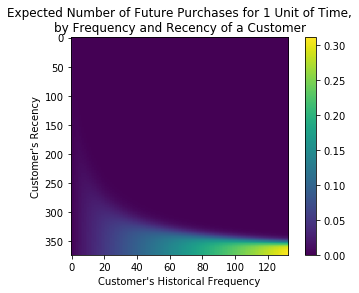

In [153]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

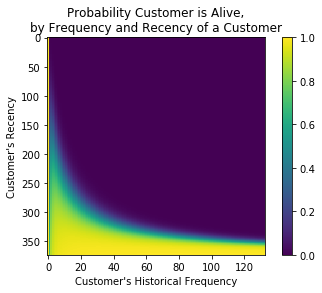

In [154]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

In [155]:
#cumulative probabilities
for i in range(1,700):
    t = i 
    lifetime_df['predicted_purchases_cum_'+ str(i)] = bgf.conditional_expected_number_of_purchases_up_to_time(t, lifetime_df['frequency'], lifetime_df['recency'], lifetime_df['T'])

In [156]:
#Now that we have the cumulative probabilities, we will check when these probabilities get as close as possible
#to one and at this date (colum), it will mean that statistcally speaking, there is a high likelihood that the customer
#will have made purchase again during that time period.
lifetime_df2 = lifetime_df.iloc[:,4:].apply(lambda x: np.abs(1-x))

In [161]:
predicted_day = lifetime_df2.idxmin(axis=1)

In [163]:
#For each customer, we get a timeframe in which he will make his next purchase
predicted_day.apply(lambda x: 'Next purchase within ' + str(x[-3:]) + ' days')

12347    Next purchase within _48 days
12348    Next purchase within _81 days
12349    Next purchase within _56 days
12350    Next purchase within 699 days
12352    Next purchase within _42 days
12353    Next purchase within 699 days
12354    Next purchase within 699 days
12355    Next purchase within 699 days
12356    Next purchase within _84 days
12357    Next purchase within _97 days
12358    Next purchase within _59 days
12359    Next purchase within _73 days
12360    Next purchase within _63 days
12361    Next purchase within 699 days
12362    Next purchase within _30 days
12363    Next purchase within 137 days
12364    Next purchase within _30 days
12365    Next purchase within 699 days
12367    Next purchase within _34 days
12370    Next purchase within _77 days
12371    Next purchase within 236 days
12372    Next purchase within _87 days
12373    Next purchase within 699 days
12374    Next purchase within _72 days
12375    Next purchase within _46 days
12377    Next purchase wi

The study period is for the next 700 days. Customers with day values of 699 days mean that there is a very low likelihood that they will ever purchase again. These are customer that made a purchase once in the past and a long time ago from the end point of the study period (frequency low, T high and Recency low).

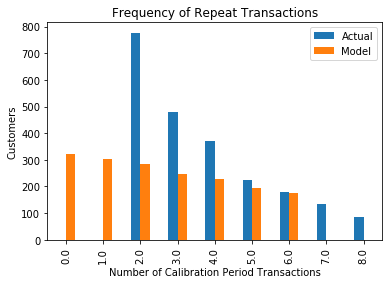

In [148]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [1017]:
t = 10 #predict purchases in 10 periods
individual = lifetime_df.iloc[0]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])
# 0.0576511

0.20902985651068831

In [ ]:
#constraint1: we only consider customers that have purchased more than once during the period.
lifetime_df2 = lifetime_df[(lifetime_df['frequency'] > 1)]

In [ ]:
#constraint2: we wonly consider customers that have an interval between their first and last purchase of at least
#two months and where the time between their first purchase and end of period is less than 6 months
lifetime_df3 = lifetime_df2[(lifetime_df2['recency'] > 60) | (lifetime_df2['T'] < 180)]